<a href="https://colab.research.google.com/github/Mynameistoni/tonyson/blob/main/PepsiCo_Stock_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [64]:
df = pd.read_csv('PEP.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200


In [65]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()
# Display the result
print("Null values in each column:\n", null_values)

Null values in each column:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [66]:
# Check the most recent stock price
df.sort_values(by='Date', ascending=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
13166,2024-08-20,173.529999,176.029999,172.500000,175.850006,5327200
13165,2024-08-19,172.660004,173.979996,172.440002,173.820007,3521700
13164,2024-08-16,172.520004,172.779999,171.110001,172.619995,4614600
13163,2024-08-15,173.710007,174.300003,171.830002,172.520004,4472100
13162,2024-08-14,172.229996,174.339996,171.929993,173.710007,3555800


In [67]:
df.describe()

,Open,High,Low,Close,Volume
count,13167.000000,13167.000000,13167.000000,13167.000000,1.316700e+04
mean,35.700170,35.979474,35.422165,35.712414,4.161206e+06
std,45.741579,46.052211,45.399711,45.737306,2.794869e+06
min,0.000000,0.146866,0.141449,0.141449,0.000000e+00
25%,1.247521,1.254301,1.239385,1.246165,2.472800e+06
50%,18.823605,19.099758,18.564689,18.836313,3.747000e+06
75%,45.157750,45.472708,44.838472,45.197689,5.259800e+06
max,189.425174,189.723904,187.864060,188.991531,4.616280e+07


### Data Preprocessing



In [68]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# set date as index, preparing data for time series analysis
df.set_index('Date', inplace=True)
#df.describe()

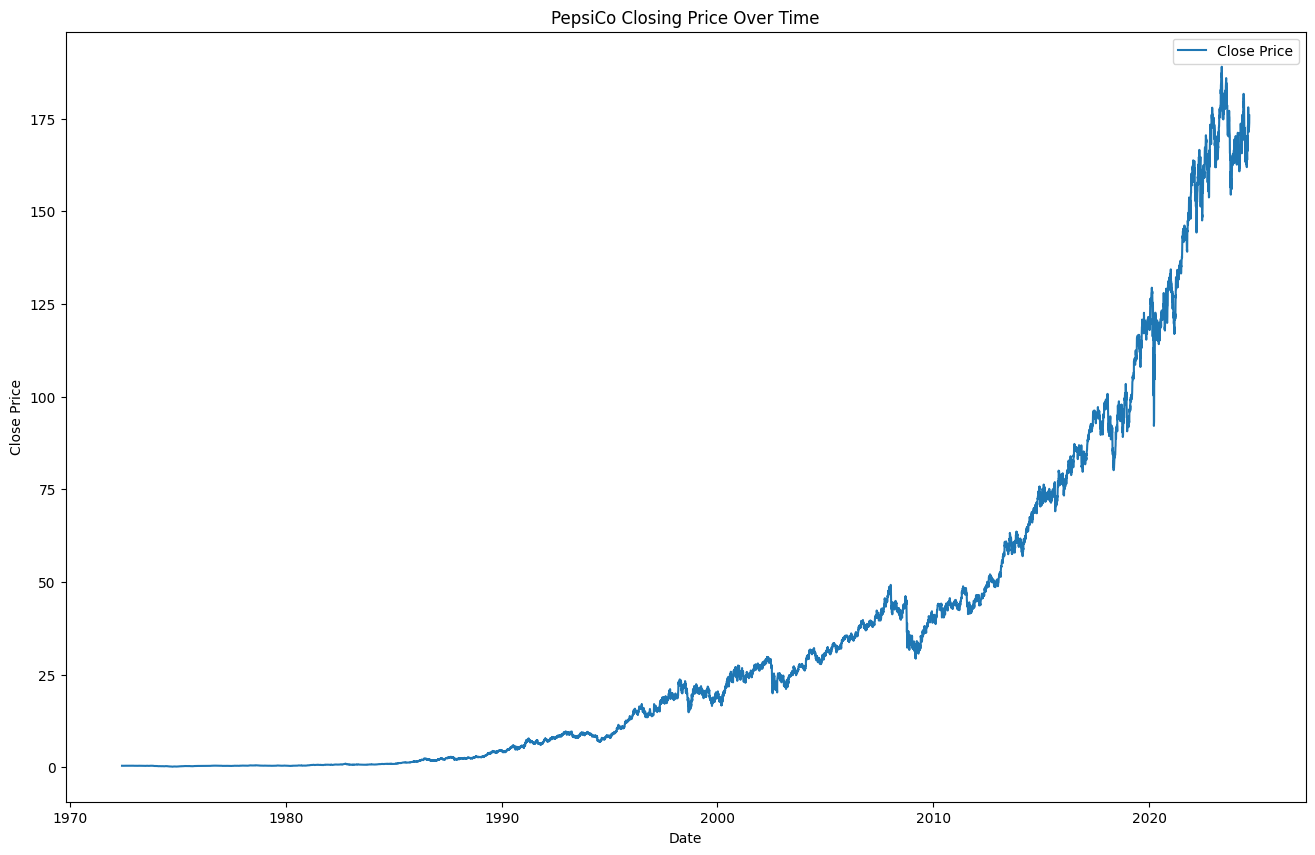

In [69]:
# Plotting the PepsiCo closing price over
plt.figure(figsize=(16, 10))
plt.plot(df['Close'], label='Close Price')
plt.title('PepsiCo Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

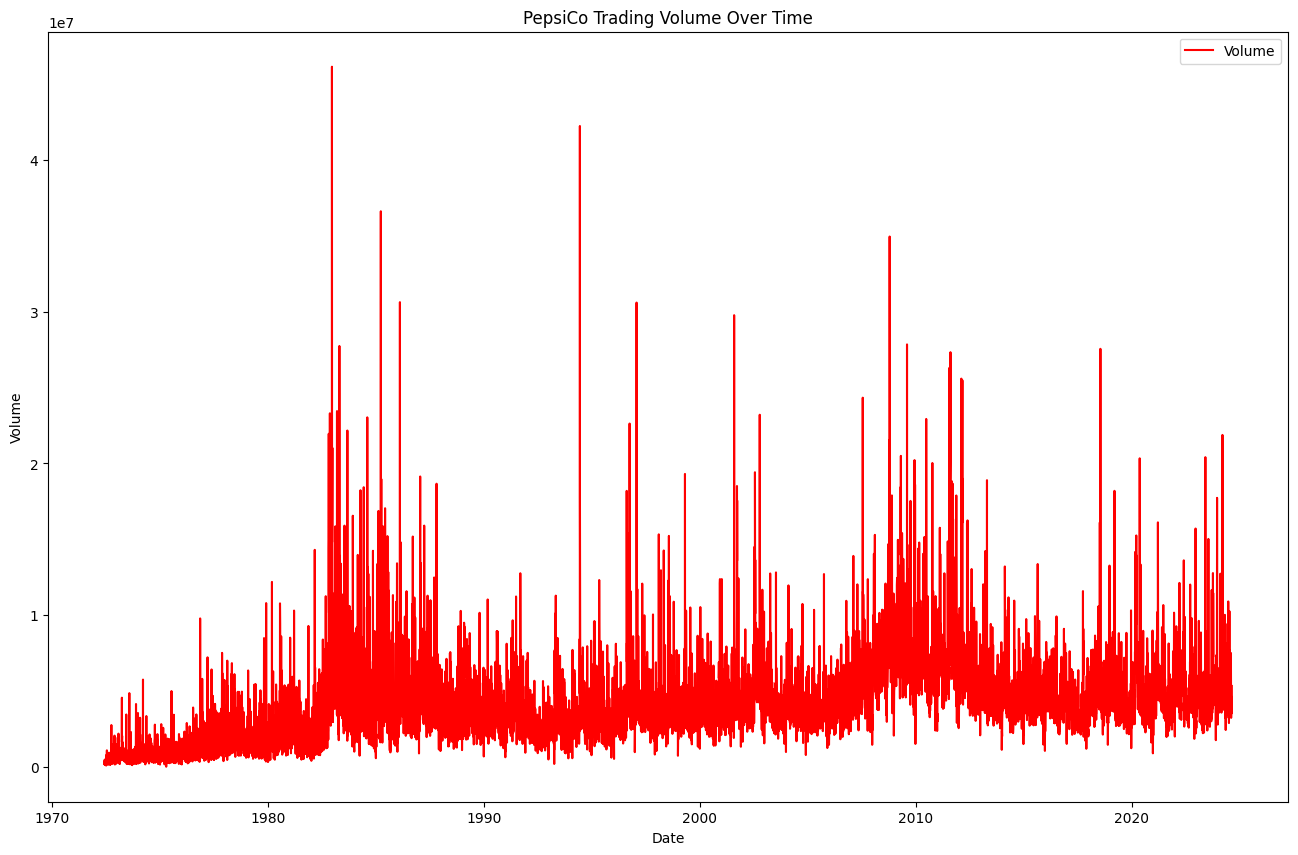

In [70]:
# Plotting the volume over time
plt.figure(figsize=(16, 10))
plt.plot(df['Volume'], label='Volume', color='red')
plt.title('PepsiCo Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Predictive Modeling with Linear Regression



1. Setting up features and target
2. Build a pipeline of standard scalar and model for five different regressors.
3. Fit all the models on training data
4. Get mean of cross-validation on the training set for all the models for
5. negative root mean square error
6. Pick the model with the best cross-validation score
7. Fit the best model on the training set and get





In [71]:
# Define the features (X) and the target (y)
X = df.drop(columns=['Close'])
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [73]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -0.286680 
DecisionTree: -0.478223 
RandomForest: -0.359614 
KNeighbors: -0.950247 
XGBRegressor: -0.559896 


### Model prediction on test data
It tells us that in this case, the fancy models don't necessarily perform better than a simple regression model because of the nature of the dateset. I'm going to test linear regression model on a test set and evaluate it with different parameters.

In [74]:
pred = pipeline_lr.predict(X_test)

In [75]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9999692060616282
Adjusted R^2: 0.9999691748462827
MAE: 0.12398381429578921
MSE: 0.06449593093927482
RMSE: 0.2539604909021772
